In [1]:
from __future__ import print_function 
from keras.datasets import mnist
# 2. Load dữ liệu MNIST 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# X_val, y_val = X_train[50000:60000,:], y_train[50000:60000] 
# X_train, y_train = X_train[:50000,:], y_train[:50000]

Using TensorFlow backend.


In [2]:
import cv2
for i in range (0,X_test.shape[0]):
    img=X_test[i]
    ret, img = cv2.threshold(img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    X_test[i]=img
for i in range (0,X_train.shape[0]):
    img=X_train[i]
    ret, img = cv2.threshold(img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    X_train[i]=img
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000] 
X_train, y_train = X_train[:50000,:], y_train[:50000]

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [5]:
from keras.utils import np_utils 
Y_train = np_utils.to_categorical(y_train, 10) 
Y_val = np_utils.to_categorical(y_val, 10) 
Y_test = np_utils.to_categorical(y_test, 10) 
print('Dữ liệu y ban đầu ', y_train[1]) 
print('Dữ liệu y sau one-hot encoding ',Y_train[1])


Dữ liệu y ban đầu  0
Dữ liệu y sau one-hot encoding  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [7]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 219us/step - loss: 0.2714 - accuracy: 0.9373 - val_loss: 0.1009 - val_accuracy: 0.9722
Epoch 2/10
50000/50000 [==============================] - 9s 190us/step - loss: 0.0966 - accuracy: 0.9722 - val_loss: 0.0799 - val_accuracy: 0.9785
Epoch 3/10
50000/50000 [==============================] - 9s 189us/step - loss: 0.0845 - accuracy: 0.9748 - val_loss: 0.0734 - val_accuracy: 0.9792
Epoch 4/10
50000/50000 [==============================] - 11s 211us/step - loss: 0.0777 - accuracy: 0.9765 - val_loss: 0.0798 - val_accuracy: 0.9760
Epoch 5/10
50000/50000 [==============================] - 11s 213us/step - loss: 0.0807 - accuracy: 0.9749 - val_loss: 0.0728 - val_accuracy: 0.9780
Epoch 6/10
50000/50000 [==============================] - 10s 196us/step - loss: 0.0787 - accuracy: 0.9756 - val_loss: 0.0785 - val_accuracy: 0.9781
Epoch 7/10
50000/50000 [==============================] -

In [8]:

score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 0.0793
Test accuracy 0.9759


In [9]:
model.save("base_model.h5")
print("Saved model to disk")

Saved model to disk


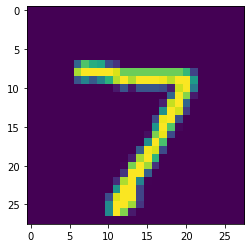

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.imshow(X_test[0].reshape(28,28))
# y_predict = model.predict(X_test[0].reshape(1,28,28,1)) 
# print('Giá trị dự đoán: ', np.argmax(y_predict))


In [5]:
X_test[0].shape

(28, 28)

In [6]:
image = np.asarray(X_test[0])
ret, image = cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

In [7]:
image.shape

(28, 28)

In [8]:
ret, image = cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

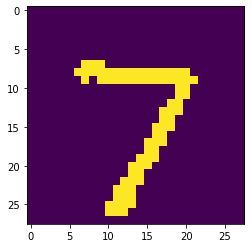

In [9]:
plt.imshow(image)

In [1]:
import os
filenames=os.listdir(os.getcwd()+"\\data-digit")
print(filenames)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [2]:
labels=[]
paths=[]
images=[]
for i in filenames:
    path=os.path.join(os.getcwd()+"\\data-digit",i)
    file_images=os.listdir(path)
    for j in file_images:
        image=os.path.join(path,j)
        images.append(image)
        labels.append(i)
    

In [3]:
images

['C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\0\\2020-03-08 11_13_06-test_1.jpg \u200e- Photos.png',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\0\\2020-03-08 11_14_39-test_1.jpg \u200e- Photos.png',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\0\\2020-03-08 11_15_05-test_1.jpg \u200e- Photos.png',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\0\\2020-03-08 11_15_25-test_1.jpg \u200e- Photos.png',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\0\\2020-03-08 11_15_33-test_1.jpg \u200e- Photos.png',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\0\\2020-03-08 11_15_48-test_1.jpg \u200e- Photos.png',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\0\\2020-03-08 11_15_53-test_1.jpg \u200e- Photos.png',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\0\\2020-03-08 11_51_47-test_2.jpg \u200e- Photos.png',
 'C:\\Us

In [1]:
import cv2
img=cv2.imread('test1.png')

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
img=cv2.resize(img,(28,28))
roi_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Lọc nhiễu bằng GaussianBlur
roi_blur = cv2.GaussianBlur(roi_gray,(3,3),1)
ret, thre = cv2.threshold(roi_blur,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
thre.shape

(28, 28)

In [3]:
roi_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Lọc nhiễu bằng GaussianBlur
roi_blur = cv2.GaussianBlur(roi_gray,(3,3),1)
ret, thre = cv2.threshold(roi_blur,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

In [26]:
kerel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(1,1))
thre = cv2.morphologyEx(thre,cv2.MORPH_ERODE,kerel3)

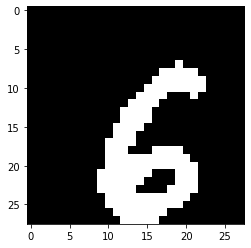

In [6]:
plt.imshow(thre.reshape(28,28), cmap='gray')


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

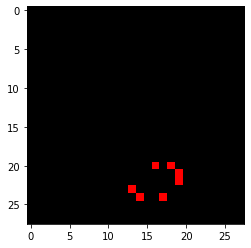

Giá trị dự đoán:  2


In [6]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [80]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
from keras.models import load_model
model=load_model('modell.h5')
img=cv2.imread('9.jpg')
roi_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
roi_blur = cv2.GaussianBlur(roi_gray,(3,3),1)

ret, thre = cv2.threshold(roi_gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
kerel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(1,1))
thre = cv2.morphologyEx(roi_blur,cv2.MORPH_ERODE,kerel3)
thre=cv2.resize(thre,(28,28))
y_predict = model.predict(thre.reshape(1,28,28,1)) 
print('Giá trị dự đoán: ', np.argmax(y_predict))

error: OpenCV(4.2.0) ..\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
